In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [2]:
# Đọc file CSV
main_data = 'continents_data.csv'
world_data = pd.read_csv("owid-covid-data.csv")
covid_data_analysis = pd.read_csv(main_data)

# Trích ngày và năm
covid_data_analysis['date'] = pd.to_datetime(covid_data_analysis['date'], format='%Y-%m-%d')
covid_data_analysis['year'] = covid_data_analysis['date'].dt.year

# In dữ liệu
print(covid_data_analysis)

       iso_code  continent       location       date  total_cases  new_cases  \
0      OWID_AFR        NaN         Africa 2020-01-05          0.0        0.0   
1      OWID_AFR        NaN         Africa 2020-01-06          0.0        0.0   
2      OWID_AFR        NaN         Africa 2020-01-07          0.0        0.0   
3      OWID_AFR        NaN         Africa 2020-01-08          0.0        0.0   
4      OWID_AFR        NaN         Africa 2020-01-09          0.0        0.0   
...         ...        ...            ...        ...          ...        ...   
10066  OWID_SAM        NaN  South America 2024-07-31   68808110.0        0.0   
10067  OWID_SAM        NaN  South America 2024-08-01   68808110.0        0.0   
10068  OWID_SAM        NaN  South America 2024-08-02   68808110.0        0.0   
10069  OWID_SAM        NaN  South America 2024-08-03   68808110.0        0.0   
10070  OWID_SAM        NaN  South America 2024-08-04   68809418.0     1308.0   

       new_cases_smoothed  total_deaths

**1. Phân tích tổng quan về tình hình COVID-19 tại các châu lục**

In [3]:
# Lọc dữ liệu
accumulative_data = covid_data_analysis.groupby(['location', 'year'])[['total_cases', 'total_deaths']].max().reset_index()

# Kiểm tra dữ liệu
print(accumulative_data)

         location  year  total_cases  total_deaths
0          Africa  2020    2662452.0       62634.0
1          Africa  2021    9634415.0      227755.0
2          Africa  2022   12994425.0      258487.0
3          Africa  2023   13133432.0      259066.0
4          Africa  2024   13145380.0      259117.0
5            Asia  2020   20190911.0      330452.0
6            Asia  2021   84190614.0     1251074.0
7            Asia  2022  250812759.0     1518727.0
8            Asia  2023  301161412.0     1635931.0
9            Asia  2024  301499099.0     1637249.0
10         Europe  2020   22615686.0      565633.0
11         Europe  2021   84508328.0     1554407.0
12         Europe  2022  242057677.0     2008370.0
13         Europe  2023  251799045.0     2094448.0
14         Europe  2024  252916868.0     2102483.0
15  North America  2020   21915965.0      522270.0
16  North America  2021   62183008.0     1217535.0
17  North America  2022  119045784.0     1546356.0
18  North America  2023  124427

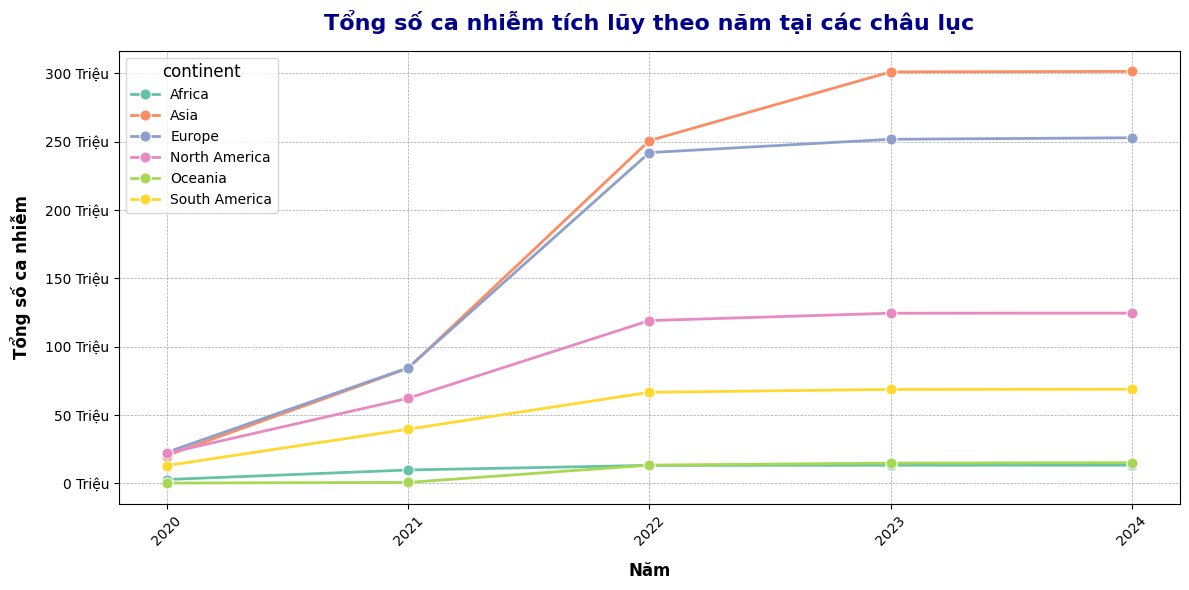

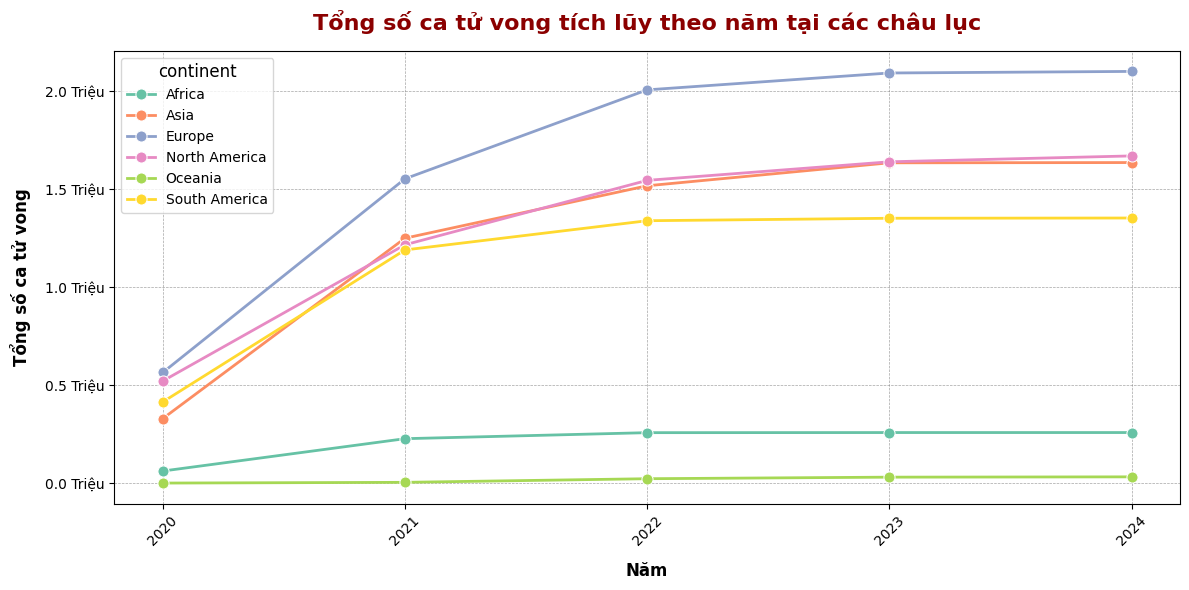

In [4]:
# Tạo biểu
plt.figure(figsize=(12, 6))
a = sns.lineplot(
    data=accumulative_data,
    x="year",
    y="total_cases",
    hue="location",
    palette="Set2",
    marker="o",
    markersize=8,
    linewidth=2
)
a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f} Triệu'))
plt.title("Tổng số ca nhiễm tích lũy theo năm tại các châu lục", fontsize=16, fontweight="bold", color="darkblue", pad=15)
plt.xlabel("Năm", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Tổng số ca nhiễm", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(accumulative_data['year'].unique(), fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(title="continent", loc="upper left", fontsize=10, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
b = sns.lineplot(
    data=accumulative_data,
    x="year",
    y="total_deaths",
    hue="location",
    palette="Set2",
    marker="o",
    markersize=8,
    linewidth=2
)
b.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f} Triệu'))
plt.title("Tổng số ca tử vong tích lũy theo năm tại các châu lục", fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("Năm", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Tổng số ca tử vong", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(accumulative_data['year'].unique(), fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(title="continent", loc="upper left", fontsize=10, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()

**2. Tỷ lệ tăng trưởng ca nhiễm mới và tỷ lệ tử vong**

In [5]:
# Lọc dữ liệu
annual_tendency = covid_data_analysis.groupby(['location', 'year']).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum'
}).reset_index()

# Kiểm tra dữ liệu
print(annual_tendency) 

         location  year    new_cases  new_deaths
0          Africa  2020    2662452.0     62637.0
1          Africa  2021    6972838.0    165121.0
2          Africa  2022    3360196.0     30733.0
3          Africa  2023     139397.0       579.0
4          Africa  2024      11948.0        51.0
5            Asia  2020   20190913.0    330512.0
6            Asia  2021   63999703.0    920622.0
7            Asia  2022  166622145.0    267653.0
8            Asia  2023   50413732.0    117204.0
9            Asia  2024     337687.0      1344.0
10         Europe  2020   22615686.0    565633.0
11         Europe  2021   61892642.0    988774.0
12         Europe  2022  157549349.0    453963.0
13         Europe  2023    9741368.0     86016.0
14         Europe  2024    1117823.0      7991.0
15  North America  2020   21915995.0    522271.0
16  North America  2021   40267043.0    695266.0
17  North America  2022   56862778.0    329152.0
18  North America  2023    5381597.0     94750.0
19  North America  2

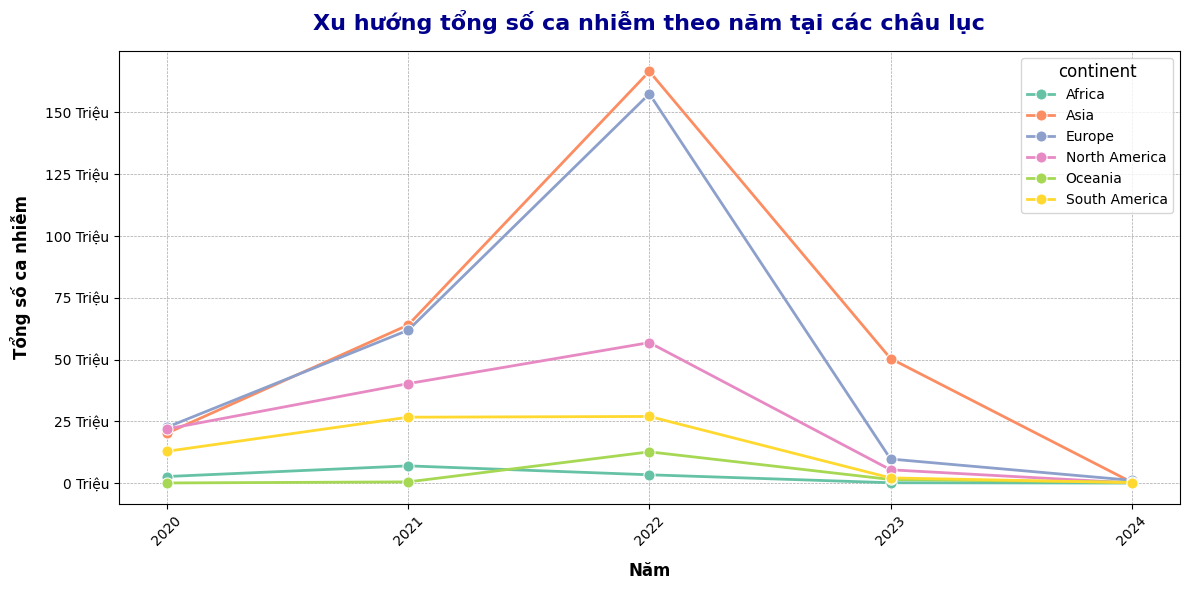

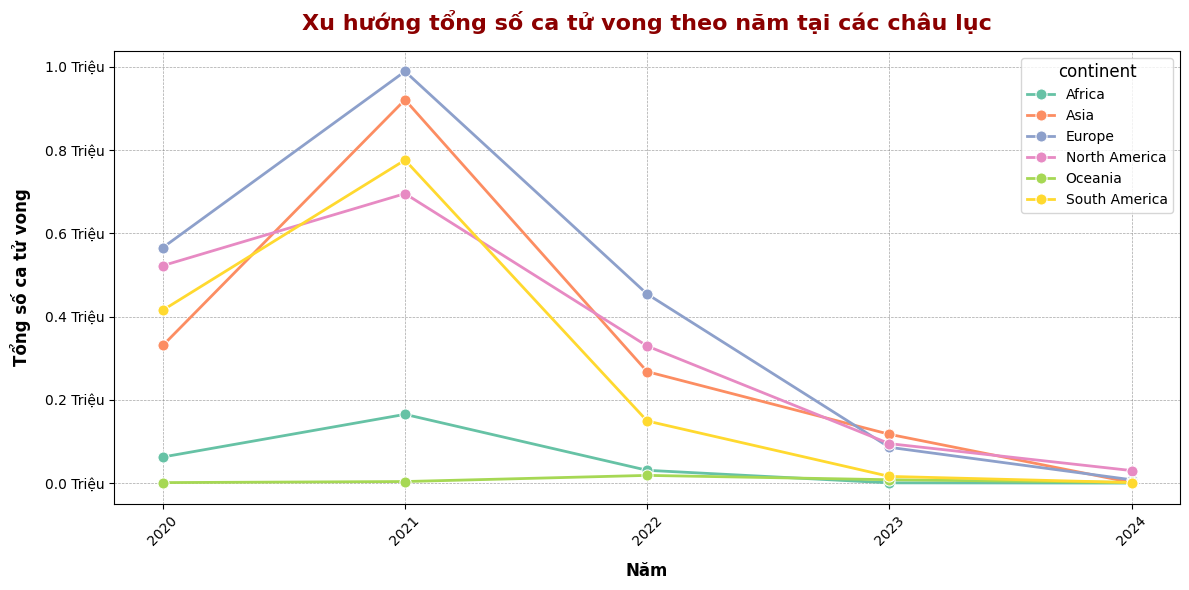

In [6]:
# Tạo biểu
plt.figure(figsize=(12, 6))
a = sns.lineplot(
    data=annual_tendency, 
    x='year', 
    y='new_cases', 
    hue='location', 
    palette='Set2',
    marker='o',
    markersize=8, 
    linewidth=2, 
    )
a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f} Triệu'))
plt.title("Xu hướng tổng số ca nhiễm theo năm tại các châu lục", fontsize=16, fontweight="bold", color="darkblue", pad=15)
plt.xlabel("Năm", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Tổng số ca nhiễm", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(annual_tendency['year'].unique(), fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(title="continent", loc="upper right", fontsize=10, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
b = sns.lineplot(
    data=annual_tendency, 
    x='year', 
    y='new_deaths', 
    hue='location',
    palette='Set2',
    marker='o',
    markersize=8, 
    linewidth=2, 
    )
b.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f} Triệu'))
plt.title("Xu hướng tổng số ca tử vong theo năm tại các châu lục", fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("Năm", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Tổng số ca tử vong", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(annual_tendency['year'].unique(), fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(title="continent", loc="upper right", fontsize=10, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()

**3. 3 nước có tổng số ca nhiễm cao nhất mỗi châu lục**

In [7]:
# Lọc dữ liệu
grouped_data = world_data.groupby(['continent', 'location'])[['total_cases']].max().reset_index()
sorted_data = grouped_data.sort_values(['continent', 'total_cases'], ascending=[True, False])
top_cases = sorted_data.groupby('continent').head(3).reset_index(drop=True)

# Kiểm tra dữ liệu
print(top_cases)

        continent       location  total_cases
0          Africa   South Africa    4072765.0
1          Africa        Morocco    1279115.0
2          Africa        Tunisia    1153361.0
3            Asia          China   99373219.0
4            Asia          India   45041748.0
5            Asia    South Korea   34571873.0
6          Europe         France   38997490.0
7          Europe        Germany   38437756.0
8          Europe          Italy   26781078.0
9   North America  United States  103436829.0
10  North America         Mexico    7619458.0
11  North America         Canada    4819055.0
12        Oceania      Australia   11861161.0
13        Oceania    New Zealand    2639048.0
14        Oceania  New Caledonia      80163.0
15  South America         Brazil   37511921.0
16  South America      Argentina   10101218.0
17  South America       Colombia    6391876.0


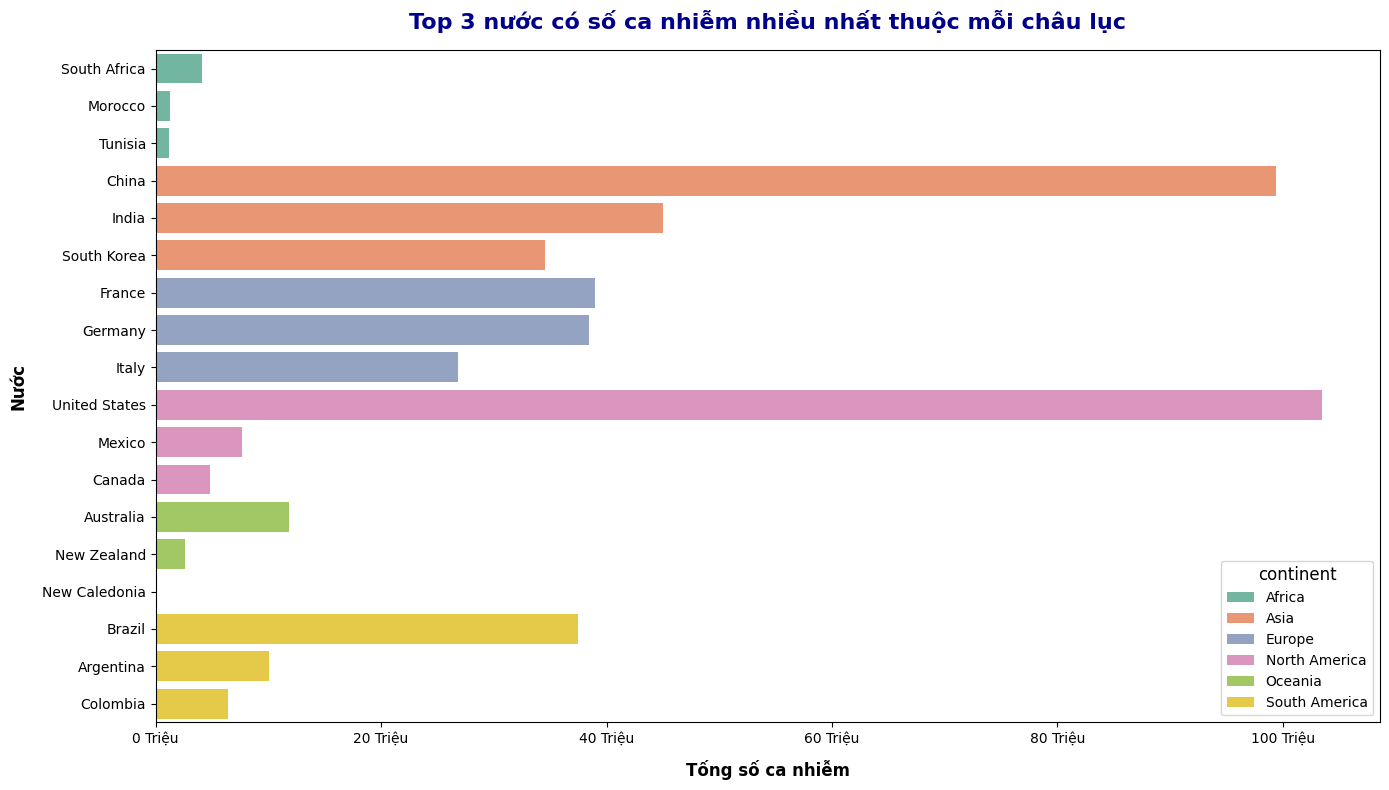

In [8]:
# Tạo biểu
plt.figure(figsize=(14, 8))
a = sns.barplot(
    data=top_cases,
    x="total_cases",
    y="location",
    hue="continent",
    palette="Set2"
)
a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{y / 1e6:.0f} Triệu'))
plt.title("Top 3 nước có số ca nhiễm nhiều nhất thuộc mỗi châu lục", fontsize=16, fontweight="bold", color="darkblue", pad=15)
plt.xlabel("Tống số ca nhiễm", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Nước", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="continent", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

**4. 3 nước có tổng số ca tử vong cao nhất mỗi châu lục**

In [9]:
# Lọc dữ liệu
grouped_data = world_data.groupby(['continent', 'location'])[['total_deaths']].max().reset_index()
sorted_data = grouped_data.sort_values(['continent', 'total_deaths'], ascending=[True, False])
top_deaths = sorted_data.groupby('continent').head(3).reset_index(drop=True)

# Kiểm tra dữ liệu
print(top_deaths)

        continent        location  total_deaths
0          Africa    South Africa      102595.0
1          Africa         Tunisia       29423.0
2          Africa           Egypt       24830.0
3            Asia           India      533623.0
4            Asia       Indonesia      162059.0
5            Asia            Iran      146837.0
6          Europe          Russia      403188.0
7          Europe  United Kingdom      232112.0
8          Europe           Italy      197307.0
9   North America   United States     1193165.0
10  North America          Mexico      334551.0
11  North America          Canada       55282.0
12        Oceania       Australia       25236.0
13        Oceania     New Zealand        4284.0
14        Oceania            Fiji         885.0
15  South America          Brazil      702116.0
16  South America            Peru      220975.0
17  South America        Colombia      142727.0


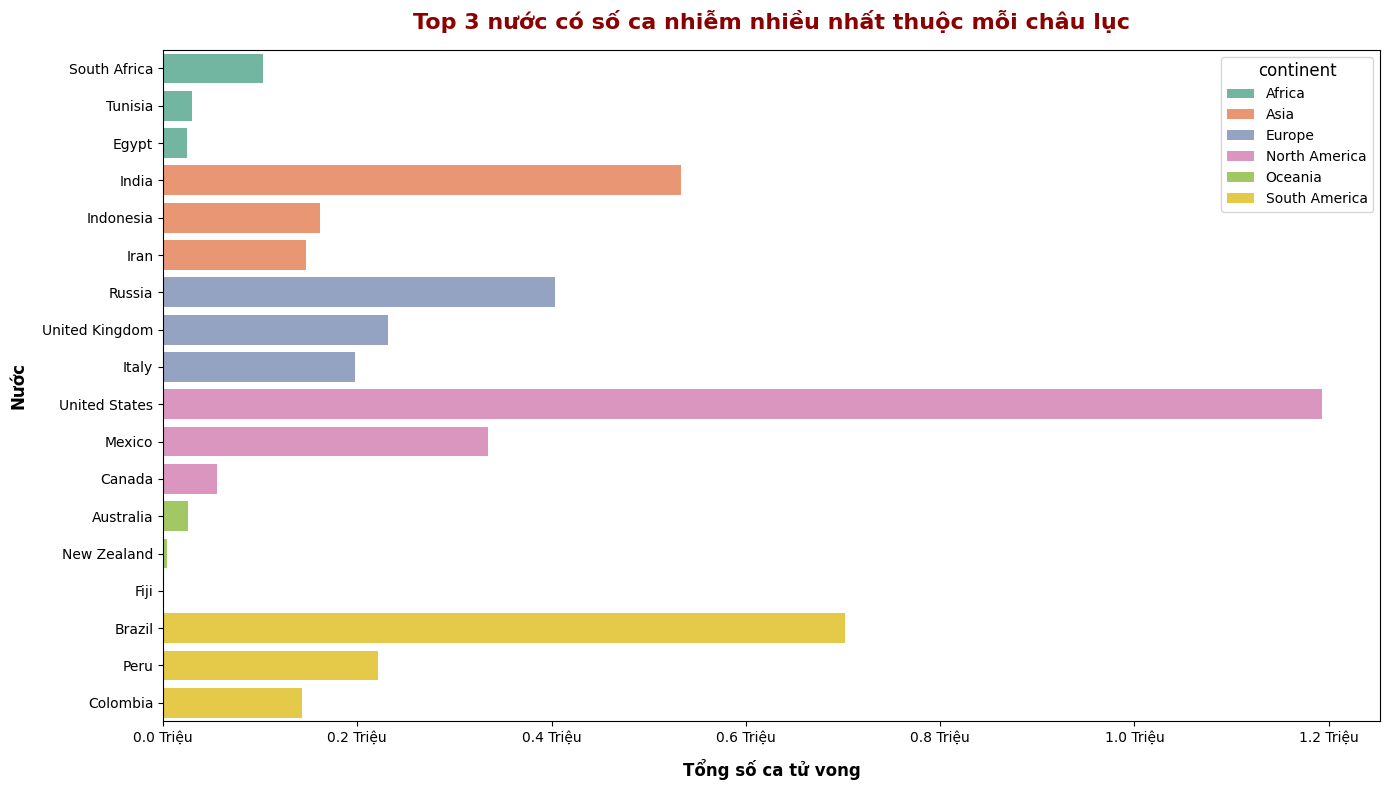

In [10]:
# Tạo biểu
plt.figure(figsize=(14, 8))
a = sns.barplot(
    data=top_deaths,
    x="total_deaths",
    y="location",
    hue="continent",
    palette="Set2"
)
a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{y / 1e6:.1f} Triệu'))
plt.title("Top 3 nước có số ca nhiễm nhiều nhất thuộc mỗi châu lục", fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("Tổng số ca tử vong", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Nước", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="continent", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

**5. Trung vị và xu hướng tỉ lệ lây nhiễm của các châu lục**

In [11]:
# Lọc dữ liệu
continent_avg_rr = world_data.groupby('continent')["reproduction_rate"].mean().reset_index()
continent_rr_over_time = world_data.groupby(["continent", "date"])["reproduction_rate"].mean().reset_index()

# Kiểm tra dữ liệu
print(continent_avg_rr)
print(continent_rr_over_time)

       continent  reproduction_rate
0         Africa           0.780345
1           Asia           0.945068
2         Europe           1.028634
3  North America           0.903540
4        Oceania           0.731186
5  South America           1.004323
           continent        date  reproduction_rate
0             Africa  2020-01-05                NaN
1             Africa  2020-01-06                NaN
2             Africa  2020-01-07                NaN
3             Africa  2020-01-08                NaN
4             Africa  2020-01-09                NaN
...              ...         ...                ...
10075  South America  2024-07-31                NaN
10076  South America  2024-08-01                NaN
10077  South America  2024-08-02                NaN
10078  South America  2024-08-03                NaN
10079  South America  2024-08-04                NaN

[10080 rows x 3 columns]


C:\Users\namda\AppData\Local\Temp\ipykernel_8980\3541354902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_avg_rr, x="continent", y="reproduction_rate", palette="pastel")


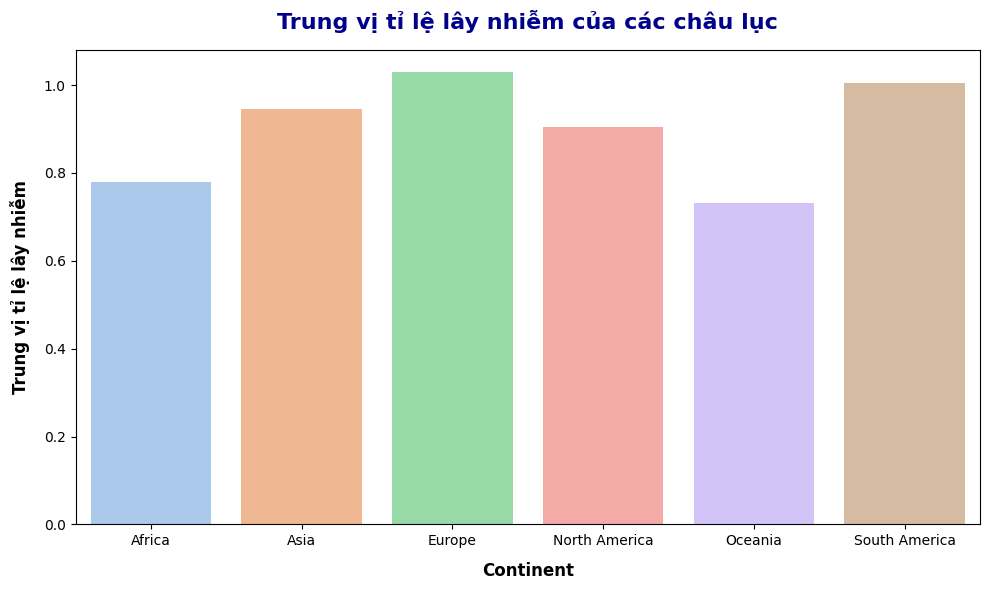

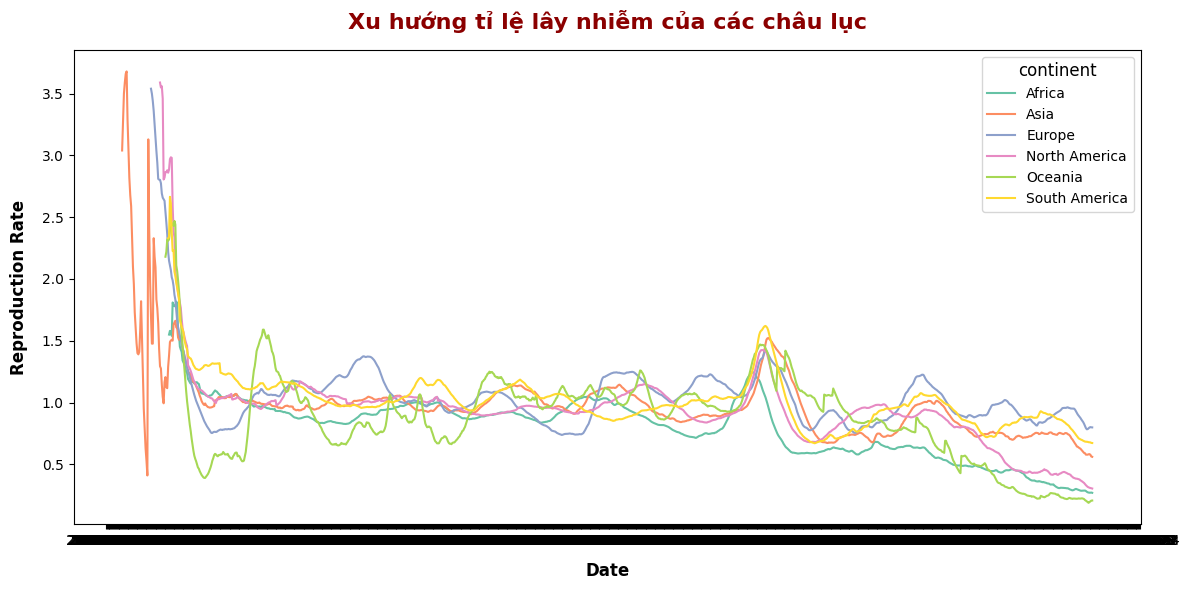

In [12]:
# Tạo biểu
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_avg_rr, x="continent", y="reproduction_rate", palette="pastel")
plt.title("Trung vị tỉ lệ lây nhiễm của các châu lục", fontsize=16, fontweight="bold", color="darkblue", pad=15)
plt.xlabel("Continent", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Trung vị tỉ lệ lây nhiễm", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=continent_rr_over_time, x="date", y="reproduction_rate", hue="continent", palette="Set2")
plt.title("Xu hướng tỉ lệ lây nhiễm của các châu lục", fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("Date", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Reproduction Rate", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="continent", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

**6. Tổng số lượt test COVID-19 và tiêm chủng của mỗi châu lục**

In [13]:
# Lọc dữ liệu
continent_totals = covid_data_analysis.groupby('location')[['total_vaccinations']].max().reset_index()

# Kiểm tra dữ liệu
print(continent_totals)

        location  total_vaccinations
0         Africa        8.632379e+08
1           Asia        9.104305e+09
2         Europe        1.399334e+09
3  North America        1.158547e+09
4        Oceania        8.835881e+07
5  South America        9.649914e+08


C:\Users\namda\AppData\Local\Temp\ipykernel_8980\298853543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(data=continent_totals, x="location", y="total_vaccinations", palette="pastel")


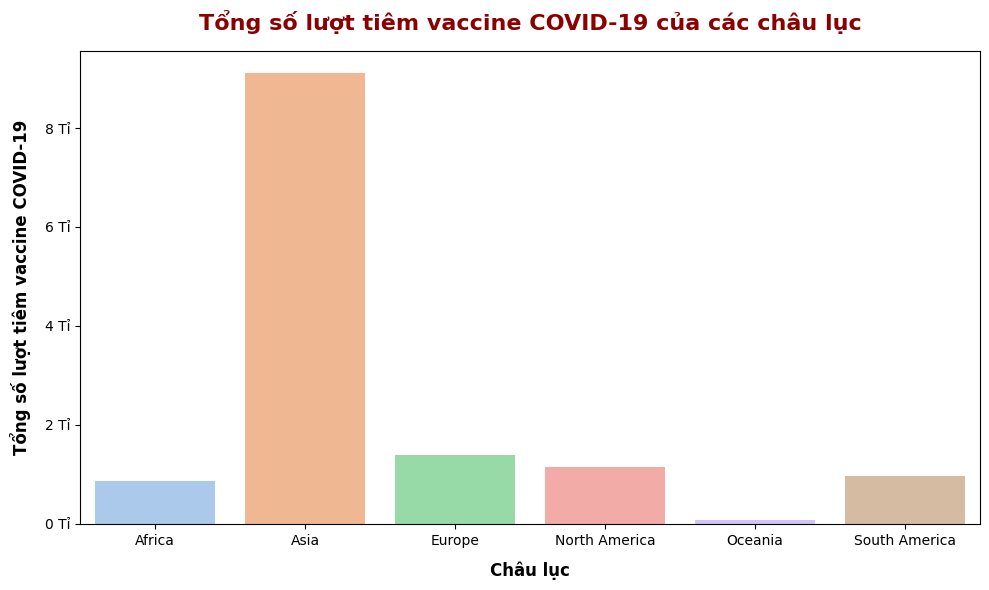

In [14]:
# Tạo biểu
plt.figure(figsize=(10, 6))
a = sns.barplot(data=continent_totals, x="location", y="total_vaccinations", palette="pastel")
a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.0f} Tỉ'))
plt.title("Tổng số lượt tiêm vaccine COVID-19 của các châu lục", fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("Châu lục", fontsize=12, labelpad=10, fontweight="bold")
plt.ylabel("Tổng số lượt tiêm vaccine COVID-19", fontsize=12, labelpad=10, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**7. Mối liên hệ giữa tuổi trung bình và tỉ lệ tiêm chủng**

In [15]:
# Lọc dữ liệu
age_vaccination_impact = world_data.groupby('continent')[['median_age', 'total_vaccinations_per_hundred']].mean().reset_index()

# Kiểm tra dữ liệu
print(age_vaccination_impact)

       continent  median_age  total_vaccinations_per_hundred
0         Africa   21.326861                       30.084896
1           Asia   30.377757                      124.555131
2         Europe   42.070697                      136.021613
3  North America   33.973660                      125.537937
4        Oceania   27.611002                      128.093362
5  South America   29.838840                      145.835559


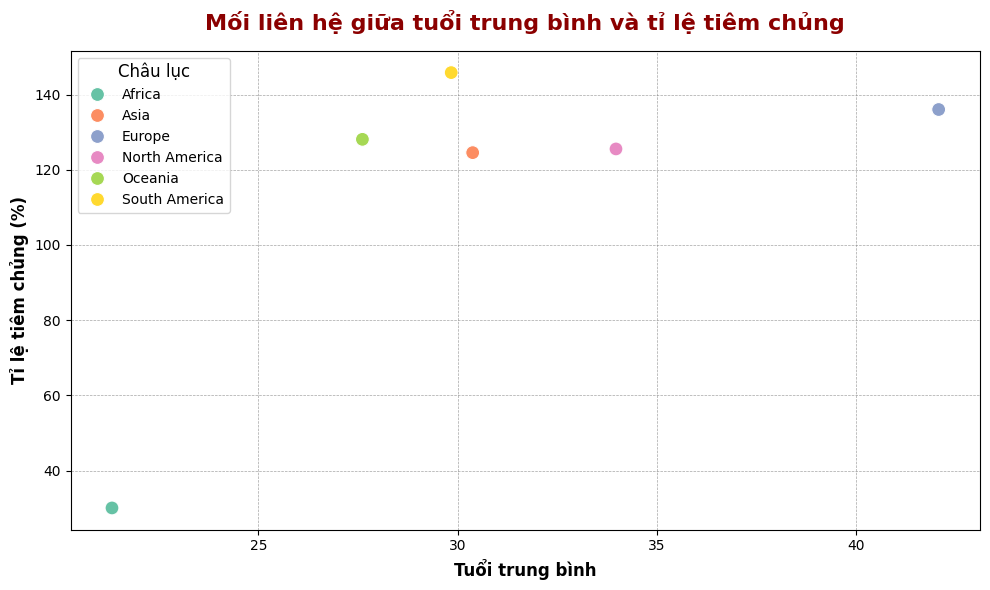

In [16]:
# Tạo biểu
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_vaccination_impact, x='median_age', y='total_vaccinations_per_hundred', hue='continent', palette='Set2', s=100)
plt.title("Mối liên hệ giữa tuổi trung bình và tỉ lệ tiêm chủng", fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("Tuổi trung bình", fontsize=12, fontweight="bold")
plt.ylabel("Tỉ lệ tiêm chủng (%)", fontsize=12, fontweight="bold")
plt.legend(title="Châu lục", title_fontsize=12, fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

**8. Mối quan hệ giữa GDP bình quân đầu người và tổng số ca nhiễm và tử vong của mỗi châu lục**

In [17]:
# Lọc dữ liệu
grouped_data = world_data.groupby('location')[['continent', 'gdp_per_capita', 'total_cases', 'total_deaths']].max().reset_index()
gdp_cases_deaths = grouped_data.groupby('continent')[['gdp_per_capita', 'total_cases', 'total_deaths']].sum().reset_index()

# Kiểm tra dữ liệu
print(gdp_cases_deaths)

       continent  gdp_per_capita  total_cases  total_deaths
0         Africa      288523.368   13145540.0      259118.0
1           Asia     1153461.779  301532347.0     1637249.0
2         Europe     1401145.971  252916868.0     2102483.0
3  North America      584691.580  124492666.0     1671178.0
4        Oceania      148646.674   15003352.0       32918.0
5  South America      166089.423   68809418.0     1355939.0


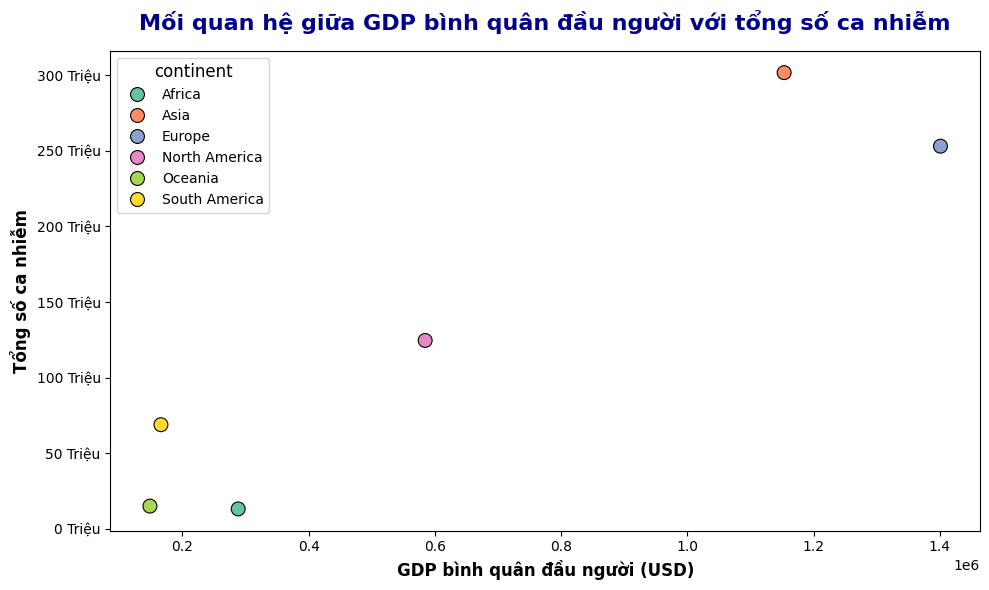

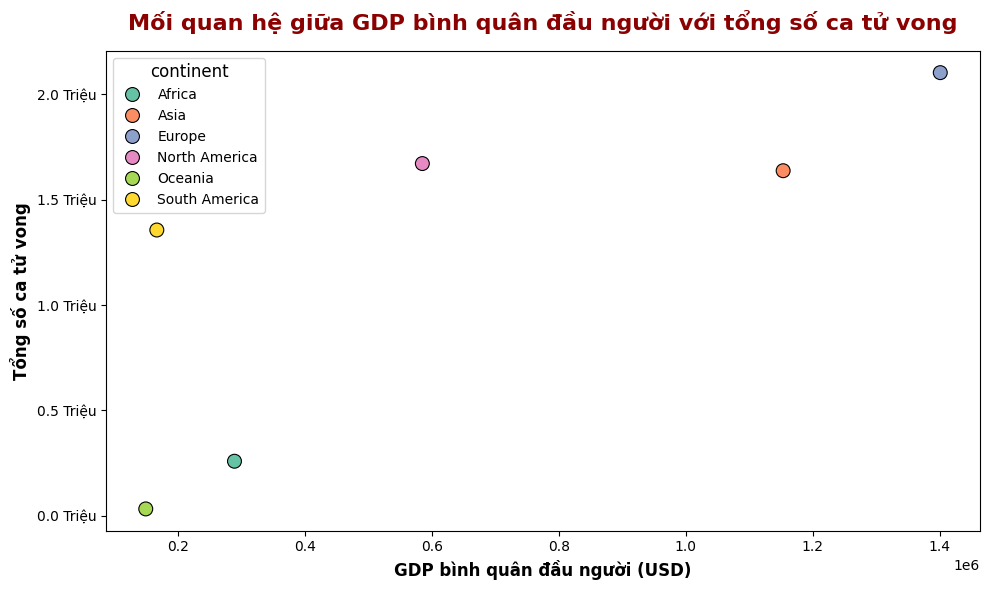

In [18]:
# Tạo biểu
plt.figure(figsize=(10, 6))
a = sns.scatterplot(data=gdp_cases_deaths, x='gdp_per_capita', y='total_cases', hue='continent', palette='Set2', s=100, edgecolor='black')
a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f} Triệu'))
plt.title('Mối quan hệ giữa GDP bình quân đầu người với tổng số ca nhiễm', fontsize=16, fontweight='bold', color="darkblue", pad=15)
plt.xlabel('GDP bình quân đầu người (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Tổng số ca nhiễm', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="continent", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
a = sns.scatterplot(data=gdp_cases_deaths, x='gdp_per_capita', y='total_deaths', hue='continent', palette='Set2', s=100, edgecolor='black')
a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f} Triệu'))
plt.title('Mối quan hệ giữa GDP bình quân đầu người với tổng số ca tử vong', fontsize=16, fontweight='bold', color="darkred", pad=15)
plt.xlabel('GDP bình quân đầu người (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Tổng số ca tử vong', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="continent", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()